<a href="https://colab.research.google.com/github/Info-stats-ai/Project_Amex-Part1-ML/blob/main/Final_Latest_copy_of_Data_602_Project_Part_4_December_6_2024_Siddharth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT 602
## PRINCIPLES OF DATA SCIENCE


SUBMITTED TO: DR. Charles Forgy
SUBMITTED BY

*  Aneesh Krishna Rao Chepuri 121324382
*  Omkarnath Thakur 121335685
*  Ruthvick K Kandrala 121305206
*  Siddharth Pathania 121291592



### INTRODUCTION


 We will be working on American Express - Default Predictions dataset from kaggle via api. We
 will be analyzing different attributes of the given datasets, performing prescriptive, descriptive
 and predictive analysis to get the likelihood that the customer using the credit card will default
 or not.We will implement different machine learning and deep learning models to ensure a best
 fit model with highest accuracy.



 STEPS INVOLVED(Tentative):

 1. DATA CLEANING:-

  * Remove Duplicate
  * Error Handling
  * Data Validation
 2. DATA PREPROCESSING:-
  * Filling NaN values and Missing Values
  * Format check all every single column.
  * Dimensionality Reduction techniques like PCA , T-SNE
  * Feature importance
  * Feature selection
 3. EDA
 4. Feature Engineering
 5. Train different ML and DL Models.
 6. Hyperparameter tuning for the best model fit and minimizing the the required loss function.




#### Location of the dataset api :- kaggle competitions download -c amex-default-prediction

#### Link for the dataset :- https://www.kaggle.com/competitions/amex-default-prediction/data

### Project part II




1. The column names of the feature(s) you plan to use for the final project, and the target outcome you plan to determine using these features.

  The dataset contains features regarding customer profile at each statement date. Features are anonymized and the fall in these categories :-

  Delinquency (D_*), Spend (S_*), Payment (P_*), Balance (B_*), and Risk (R_*).
  We will be using these features for the final project. Along the process we will drop features which are less relevant, thus keeping only important features.

  The target is a binary variable, and it tells us whether a customer has paid or has not paid his due amount in 120 days after their latest statement, therefore we will predict this target variable using the features.


2.  Your initial plan for any feature engineering (e.g. adding a Boolean for weekend vs. weekday or taking the ratio of two other features).

  For the American Express Default Prediction, the initial approach will involve:



*   Categorical columns:
  * Apply one-hot encoding for nominal categories and  for cardinal data.
  * Use frequency or target encoding with smoothing to capture relationships with the target variables.


*   Numerical columns:
  * Handle missing data using KNN imputation or Missing Value imputation using ML models.
  * Scale features and create meaningful interactions (ratios, differences).
  * Apply PCA  or  LDA to reduce dimensionality.


*   Time-based columns (date columns):
  * Create lagged features and rolling windows to capture customer behavior over time.


*   Aggregation:
  * Aggregate transaction-level data to customer-level using statistics like mean, sum, and standard deviation.


*   Feature selection:
  * Apply techniques to retain the most important features for model refinement.





3. If you plan to use any sort of method for dealing with imbalanced data, detail your overall approach (e.g. "will oversample class XYZ", or "will create synthetic data using SMOTE"). If you do not intend to use any techniques to deal with imbalanced data, explain why it is not necessary (e.g. "all features are at worst imbalanced 7:3").

  Based on the initial data analysis we saw that % data for people who default is less as compared to people who have paid. To handle this situation we are planning to use different methods, and will see which one works best for us. Also we know that credit defaults are typically rare events, often comprising less %age of the dataset.

  * **Oversampling the minority class:** We'll use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples of the minority class. This will help balance the dataset without simply duplicating existing data points.

  * **Undersampling the majority class:** We'll carefully undersample the majority class (non-defaulters) using methods like Random Under Sampling or Tomek links to remove some of the majority instances while maintaining the dataset's quality.

  * **Ensemble methods:** We'll use ensemble techniques like BalancedRandomForestClassifier or EasyEnsembleClassifier, which are designed to handle imbalanced datasets effectively.

  * **Class-weight adjustment:** Assign higher weights to the minority class in algorithms like Random Forest, XGBoost, or Logistic Regression making the model more sensitive to defaults.

  Here are some initial techniques that we are planning to use. Along the process if we find more useful techniques we will use them as well, and then we will carefully monitor performance metrics to see which methods are more effective to give us more accurate results.



#### Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import warnings, gc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import gc
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




### Reading the dataset

Reading the dataset.

Data preprocessing.

Data analysis

Feature Engineering

Model training - For classification tasks this entails comparing logistic regression (with or without regularization) to a classification tree or any type of classification forest.
Discuss the accuracy of your methods, both on testing and training data. Is any method clearly superior? What does this say about the linear nature of your data?

#### Data preprocessing

In [ ]:
# Reduce memory usage by downcasting numerical features
def reduce_mem_usage(df):
    """Iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and pd.api.types.is_numeric_dtype(col_type): # Check if column is numeric
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            # Keep timestamp and object columns as they are, or handle separately
            if col_type == 'object':
                df[col] = df[col].astype('category') #This part was also updated to accommodate the fact that timestamps will not be treated as objects

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


# Read the dataset
from google.colab import drive
drive.mount('/content/drive')
data_df = pd.read_feather('/content/drive/MyDrive/train_data.ftr')
data_df = reduce_mem_usage(data_df)  # Apply memory optimization

Mounted at /content/drive
Memory usage of dataframe is 2052.06 MB
Memory usage after optimization is: 2013.66 MB
Decreased by 1.9%


In [ ]:
data_df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


In [ ]:
# : Reduce the data size to 30% so that we can work with less data and have
# some memory free

import pandas as pd

# Reduce the size by selecting a random subset of rows
# data_df_reduced = data_df.sample(frac=0.3, random_state=42)  # Adjust 'frac' as needed

data_df_reduced = data_df.sample(frac=0.01, random_state=42)  # Adjust 'frac' as needed

# Print the size before and after reduction
print(f"Original DataFrame size: {data_df.shape}")
print(f"Reduced DataFrame size: {data_df_reduced.shape}")

# Now you can work with 'data_df_reduced' instead of 'data_df'

Original DataFrame size: (5531451, 191)
Reduced DataFrame size: (55315, 191)


In [ ]:
data_df = data_df_reduced
data_df_reduced = pd.DataFrame()
gc.collect()

0

In [ ]:
# Splitting the data

from sklearn.model_selection import train_test_split

# Replace 'target_variable' with your actual target column name

# Split the data into training and testing sets
train_df, test_df = train_test_split(
    data_df, test_size=0.2, random_state=42
)  # Adjust test_size and random_state as needed

print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

# Removing the data_df to free up some memory

del data_df
gc.collect()

Training data shape: (44252, 191)
Testing data shape: (11063, 191)


0

In [ ]:
print("Training data shape before dropping the duplicates ", train_df.shape)
print("Testing data shape before dropping the duplicates ", test_df.shape)

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

print("Training data shape after dropping the duplicates ", train_df.shape)
print("Testing data shape after dropping the duplicates ", test_df.shape)

Training data shape before dropping the duplicates  (44252, 191)
Testing data shape before dropping the duplicates  (11063, 191)
Training data shape after dropping the duplicates  (44252, 191)
Testing data shape after dropping the duplicates  (11063, 191)


In [ ]:
print("\nMissing Values in Training data:")
print(train_df.isnull().sum())

print("\nMissing Values in Test data:")
print(test_df.isnull().sum())


Missing Values in Training data:
customer_ID        0
S_2                0
P_2              376
D_39               0
B_1                0
               ...  
D_142          36563
D_143            788
D_144            295
D_145            788
target             0
Length: 191, dtype: int64

Missing Values in Test data:
customer_ID       0
S_2               0
P_2              95
D_39              0
B_1               0
               ... 
D_142          9171
D_143           194
D_144            77
D_145           194
target            0
Length: 191, dtype: int64


In [ ]:
categorical_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117',
                        'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']


In [ ]:
train_df['target'].unique()

array([0, 1], dtype=int8)

In [ ]:
train_df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

In [ ]:
# : Based S_2 plot a bar graph showing the percentage of paid and not paid
# default aka the target varaible for the last one month for each day in plotly


# Convert 'S_2' to datetime if it's not already
train_df['S_2'] = pd.to_datetime(train_df['S_2'])

# Filter data for the last one month
last_month = train_df['S_2'].max() - pd.DateOffset(months=1)
last_month_data = train_df[train_df['S_2'] >= last_month]

# Group by day and calculate the percentage of paid and not paid defaults
daily_default_percentage = last_month_data.groupby([train_df['S_2'].dt.date, 'target'])['target'].count().unstack().fillna(0)

daily_default_percentage['Total'] = daily_default_percentage[0] + daily_default_percentage[1]
daily_default_percentage['Paid_Percentage'] = (daily_default_percentage[0] / daily_default_percentage['Total']) * 100
daily_default_percentage['Not_Paid_Percentage'] = (daily_default_percentage[1] / daily_default_percentage['Total']) * 100


# Create the bar graph using Plotly
fig = go.Figure(data=[
    go.Bar(
        name='Not Paid',
        x=daily_default_percentage.index,
        y=daily_default_percentage['Not_Paid_Percentage'],
        marker=dict(color='#FF4C4C')  # Set color to red
    ),
    go.Bar(
        name='Paid',
        x=daily_default_percentage.index,
        y=daily_default_percentage['Paid_Percentage'],
        marker=dict(color='#4C9AFF')
    )
])

fig.update_layout(
    barmode='group',
    xaxis_title='Day',
    yaxis_title='Percentage',
    title='Percentage of Paid and Not Paid Defaults in the Last Month'
)

fig.show()


In [ ]:
print("\nMissing Values in Training data:")
print(train_df.isnull().sum())

print("\nMissing Values in Test data:")
print(test_df.isnull().sum())


Missing Values in Training data:
customer_ID        0
S_2                0
P_2              376
D_39               0
B_1                0
               ...  
D_142          36563
D_143            788
D_144            295
D_145            788
target             0
Length: 191, dtype: int64

Missing Values in Test data:
customer_ID       0
S_2               0
P_2              95
D_39              0
B_1               0
               ... 
D_142          9171
D_143           194
D_144            77
D_145           194
target            0
Length: 191, dtype: int64


In [ ]:
categorical_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117',
                        'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']


In [ ]:
# Checking the null values in columns in train_df and wherever the percentage
# of null values are more that 70% drop those columns in both train_df and
# test_df

# Calculate the percentage of null values for each column in train_df
null_percentage = train_df.isnull().mean() * 100

# Identify columns with more than 70% null values
columns_to_drop = null_percentage[null_percentage > 70].index.tolist()

# Drop the identified columns from both train_df and test_df
train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

print("Columns dropped:", columns_to_drop)
print("New training data shape:", train_df.shape)
print("New testing data shape:", test_df.shape)

Columns dropped: ['D_42', 'D_49', 'D_53', 'D_66', 'D_73', 'D_76', 'R_9', 'D_82', 'B_29', 'D_87', 'D_88', 'D_106', 'R_26', 'D_108', 'D_110', 'D_111', 'B_39', 'B_42', 'D_132', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_142']
New training data shape: (44252, 166)
New testing data shape: (11063, 166)


In [ ]:
print("\nMissing Values in Training data:")
print(train_df.isnull().sum())

print("\nMissing Values in Test data:")
print(test_df.isnull().sum())


Missing Values in Training data:
customer_ID      0
S_2              0
P_2            376
D_39             0
B_1              0
              ... 
D_141          788
D_143          788
D_144          295
D_145          788
target           0
Length: 166, dtype: int64

Missing Values in Test data:
customer_ID      0
S_2              0
P_2             95
D_39             0
B_1              0
              ... 
D_141          194
D_143          194
D_144           77
D_145          194
target           0
Length: 166, dtype: int64


In [ ]:
# Function to handle missing values
def handle_missing_values(df, categorical_features):
  """Handles missing values in a DataFrame.

  Args:
      df: Pandas DataFrame.
      categorical_features: List of categorical feature names.

  Returns:
      Pandas DataFrame with missing values handled.
  """
  for column in df.columns:
    if column in categorical_features:
      # Add 'Unknown' to the categories if it's not already present
      if 'Unknown' not in df[column].cat.categories:
        df[column] = df[column].cat.add_categories(['Unknown'])
      df[column].fillna('Unknown', inplace=True)  # Fill with 'Unknown' for categorical
    else:
      # Check if the column is numeric before calculating median
      if pd.api.types.is_numeric_dtype(df[column]):
        # Fill with median for numerical
        df[column].fillna(df[column].median(), inplace=True)
      else:
        # Handle non-numeric columns (e.g., fill with mode or a specific value)
        # For demonstration, filling with the most frequent value (mode)
        # Add 'Unknown' to the categories if it's not already present and the column is categorical
        if pd.api.types.is_categorical_dtype(df[column]) and 'Unknown' not in df[column].cat.categories:
          df[column] = df[column].cat.add_categories(['Unknown'])
        df[column].fillna('Unknown', inplace=True)
  return df


# Handle missing values in train_df and test_df
train_df = handle_missing_values(train_df, categorical_features)
test_df = handle_missing_values(test_df, categorical_features)

print("\nMissing Values in Training data after handling:")
print(train_df.isnull().sum())

print("\nMissing Values in Test data after handling:")
print(test_df.isnull().sum())


Missing Values in Training data after handling:
customer_ID    0
S_2            0
P_2            0
D_39           0
B_1            0
              ..
D_141          0
D_143          0
D_144          0
D_145          0
target         0
Length: 166, dtype: int64

Missing Values in Test data after handling:
customer_ID    0
S_2            0
P_2            0
D_39           0
B_1            0
              ..
D_141          0
D_143          0
D_144          0
D_145          0
target         0
Length: 166, dtype: int64


In [ ]:
# Plot for the percentage of lables / target for both the classes

import plotly.graph_objects as go

def plot_target_percentage_donut(df, target_column):
  """Plots a donut chart showing the percentage of each class in the target column.

  Args:
      df: Pandas DataFrame containing the target column.
      target_column: Name of the target column.
  """

  target_counts = df[target_column].value_counts()
  labels = target_counts.index.tolist()
  values = target_counts.values.tolist()

  # Create the donut chart
  fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])

  # Customize the chart
  fig.update_traces(
      marker=dict(
          colors=['lightgreen', 'lightblue'],
          line=dict(color='#000000', width=2)
      )
  )

  fig.update_layout(
      title_text="Percentage of Target Classes",
      title_font_size=20,
      width=600,
      height=400,
      showlegend=True,
      annotations=[
          dict(text='Target Distribution', x=0.5, y=0.5, font_size=16, showarrow=False)
      ]
  )

  fig.show()

plot_target_percentage_donut(train_df, 'target')

#### Correlation based EDA and Feature Engineering

In [ ]:
# Initialize counters for each category
d_count = 0
s_count = 0
p_count = 0
b_count = 0
r_count = 0

# Iterate through column names and categorize them
for col in train_df.columns:
    if col.startswith('D_'):
        d_count += 1
    elif col.startswith('S_'):
        s_count += 1
    elif col.startswith('P_'):
        p_count += 1
    elif col.startswith('B_'):
        b_count += 1
    elif col.startswith('R_'):
        r_count += 1

# Print the counts for each category
print(f"Number of D_ features: {d_count}")
print(f"Number of S_ features: {s_count}")
print(f"Number of P_ features: {p_count}")
print(f"Number of B_ features: {b_count}")
print(f"Number of R_ features: {r_count}")

import plotly.graph_objects as go

labels = ['Delinquency', 'Spend', 'Payment', 'Balance', 'Risk']
values = [d_count, s_count, p_count, b_count, r_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="Feature Distribution by Category", title_x=0.5)
fig.show()

Number of D_ features: 76
Number of S_ features: 22
Number of P_ features: 3
Number of B_ features: 37
Number of R_ features: 26


In [ ]:
!pip install plotly
import plotly.graph_objects as go
from itertools import cycle
import pandas as pd

palette = cycle(["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"])

# Select only numeric columns for correlation calculation
numeric_train_df = train_df.select_dtypes(include=['number'])

# Calculate correlation with the target variable for numeric columns
targ = numeric_train_df.corrwith(numeric_train_df['target'], axis=0)

# Sort correlations in descending order (preserving signs)
targ_sorted = targ.sort_values(ascending=False)


# val = [str(round(v ,1) *100) + '%' for v in targ_sorted.values]
# Format the values for display (rounding to 2 decimal places and converting to percentage)
val = [str(round(v * 100, 2)) + '%' for v in targ_sorted.values]


fig = go.Figure()
fig.add_trace(go.Bar(y=targ_sorted.index,
                     x= targ_sorted.values, orientation='h',
                     text = val))
fig.update_layout(title = "Correlation of variables with Target",width = 750,
                  height = 3500)
fig.show() # added fig.show() to display the figure

In [ ]:
# Select only numeric columns for correlation calculation
numerical_features = train_df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = train_df[numerical_features].corr()

# Get the correlation with the target variable
target_correlations = correlation_matrix['target'].drop('target')

# Find features with high positive and negative correlations
highly_correlated_positive = target_correlations[target_correlations > 0.1]
highly_correlated_negative = target_correlations[target_correlations < -0.1]

# Combine positive and negative correlations
highly_correlated_features = pd.concat([highly_correlated_positive,
                                        highly_correlated_negative])

print("Highly correlated features with target (above 0.1 or below -0.1):")
print(highly_correlated_features)

len(highly_correlated_features)
desired_columns = list(highly_correlated_features.index) + categorical_features
desired_columns = [col for col in desired_columns if col in train_df.columns]

# Getting target and S_2
desired_columns.append('target')
desired_columns.append('S_2')
desired_columns.append('customer_ID')

Highly correlated features with target (above 0.1 or below -0.1):
D_39     0.193504
B_1      0.390031
R_1      0.364963
S_3      0.316361
D_41     0.249867
           ...   
D_121   -0.160888
D_122   -0.156204
D_127   -0.176942
D_128   -0.183835
D_129   -0.137728
Name: target, Length: 97, dtype: float64


In [ ]:
# Select only numeric columns for correlation calculation
numerical_features = train_df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = train_df[numerical_features].corr()

# Get the correlation with the target variable
target_correlations = correlation_matrix['target'].drop('target')

# Find features with high positive and negative correlations
highly_correlated_positive = target_correlations[target_correlations > 0.1]
highly_correlated_negative = target_correlations[target_correlations < -0.1]

# Combine positive and negative correlations
highly_correlated_features = pd.concat([highly_correlated_positive,
                                        highly_correlated_negative])

print("Highly correlated features with target (above 0.1 or below -0.1):")
highly_correlated_features

Highly correlated features with target (above 0.1 or below -0.1):


,target
D_39,0.193504
B_1,0.390031
R_1,0.364963
S_3,0.316361
D_41,0.249867
...,...
D_121,-0.160888
D_122,-0.156204
D_127,-0.176942
D_128,-0.183835


In [ ]:
# Getting the mandatory columns as well

desired_columns = list(highly_correlated_features.index) + categorical_features
desired_columns = [col for col in desired_columns if col in train_df.columns]
desired_columns.append('target')
desired_columns.append('S_2')
desired_columns.append('customer_ID')


In [ ]:
# desired_columns

In [ ]:
print("Data shape before removing highly correlated features for train",
      train_df.shape)

print("Data shape before removing highly correlated features for test",
      test_df.shape)

train_df = train_df[desired_columns]
test_df = test_df[desired_columns]


print("Data shape after removing highly correlated features for train",
      train_df.shape)

print("Data shape after removing highly correlated features for test",
      test_df.shape)


Data shape before removing highly correlated features for train (44252, 166)
Data shape before removing highly correlated features for test (11063, 166)
Data shape after removing highly correlated features for train (44252, 110)
Data shape after removing highly correlated features for test (11063, 110)


##### Correlations between Risk Features

In [ ]:
#### Correlations between Risk Features
import plotly.graph_objects as go
import plotly.express as px

# Select columns starting with 'R_'
r_columns = [col for col in train_df.columns if col.startswith('R_')]

# Check if any 'R_' columns exist
if not r_columns:
    print("No columns found starting with 'R_'.")
else:
    # Calculate the correlation matrix for 'R_' columns
    r_correlation = train_df[r_columns].corr()

    # Plot the heatmap using Plotly
    fig = px.imshow(r_correlation,
                   labels=dict(x="Features", y="Features", color="Correlation"),
                   x=r_columns,
                   y=r_columns,
                   color_continuous_scale='RdBu', # Use a diverging color scale
                   zmin=-1, zmax=1) # Set color scale limits

    fig.update_layout(
        title="Correlation Matrix of Risk Features",
        width=800,  # Adjust the width as needed
        height=800, # Adjust the height as needed
    )
    fig.show()

##### Correlations between Delinquency Features

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd  # Import pandas for select_dtypes

# Select columns starting with 'D_'
r_columns = [col for col in train_df.columns if col.startswith('D_')]

# Check if any 'D_' columns exist
if not r_columns:
    print("No columns found starting with 'D_'.")
else:
    # Select only numeric columns within r_columns for correlation
    numeric_r_columns = train_df[r_columns].select_dtypes(include=np.number).columns.tolist()

    # Calculate the correlation matrix for numeric 'D_' columns
    r_correlation = train_df[numeric_r_columns].corr()

    # Plot the heatmap using Plotly
    fig = px.imshow(r_correlation,
                   labels=dict(x="Features", y="Features", color="Correlation"),
                   x=numeric_r_columns,  # Use numeric columns for x and y
                   y=numeric_r_columns,
                   color_continuous_scale='RdBu', # Use a diverging color scale
                   zmin=-1, zmax=1) # Set color scale limits

    fig.update_layout(
        title="Correlation Matrix of Delinquency Features",
        width=800,  # Adjust the width as needed
        height=800, # Adjust the height as needed
    )
    fig.show()

In [ ]:

feature_groups = {
    'Delinquency': [col for col in train_df.columns if col.startswith('D_')],
    'Spend': [col for col in train_df.columns if col.startswith('S_')],
    'Payment': [col for col in train_df.columns if col.startswith('P_')],
    'Balance': [col for col in train_df.columns if col.startswith('B_')],
    'Risk': [col for col in train_df.columns if col.startswith('R_')]
}

In [ ]:

def remove_highly_correlated_features(df, feature_groups, delinquency_threshold=0.9, other_threshold=0.7):
    """Removes highly correlated features from specified groups in a DataFrame.

    Args:
        df: The input DataFrame.
        feature_groups: A dictionary where keys are group names and values are lists of feature names within each group.
        delinquency_threshold: Correlation threshold for 'Delinquency' group.
        other_threshold: Correlation threshold for other groups.

    Returns:
        A new DataFrame with highly correlated features removed.
    """

    df_filtered = df.copy()  # Create a copy to avoid modifying the original DataFrame
    for group_name, features in feature_groups.items():
        if features:  # Check if the list of features is not empty
            # Select only numeric features for correlation calculation
            numeric_features = df_filtered[features].select_dtypes(include=np.number).columns.tolist()

            # If there are numeric features in the group, calculate correlation
            if numeric_features:
                corr_matrix = df_filtered[numeric_features].corr()
                upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                threshold = delinquency_threshold if group_name == 'Delinquency' else other_threshold

                to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
                df_filtered = df_filtered.drop(columns=to_drop)
            else:
                print(f"No numeric features found in group: {group_name}") #Print message for groups with no numeric features

    return df_filtered

# Example usage
train_df_filtered = remove_highly_correlated_features(train_df, feature_groups)
test_df_filtered = remove_highly_correlated_features(test_df, feature_groups) # Apply to test_df as well

print("Shape of the training data after removing highly correlated features:", train_df_filtered.shape)
print("Shape of the testing data after removing highly correlated features:", test_df_filtered.shape)

Shape of the training data after removing highly correlated features: (44252, 89)
Shape of the testing data after removing highly correlated features: (11063, 88)


In [ ]:
train_df = train_df_filtered
test_df = test_df_filtered
train_df_filtered = pd.DataFrame()
test_df_filtered = pd.DataFrame()
gc.collect()

1546

#### Categorical based EDA and feature engineering

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117',
            'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Define color palettes
rgb = ['rgba(100, 149, 237, 0.8)', 'rgba(255, 69, 0, 0.8)']  # Cornflower Blue & OrangeRed
pal = ['rgba(70, 130, 180, 1)', 'rgba(220, 20, 60, 1)']       # Steel Blue & Crimson

# Check for missing columns
missing_cols = [col for col in cat_cols if col not in train_df.columns]
if missing_cols:
    print(f"The following columns are not in train_df: {missing_cols}")
    cat_cols = [col for col in cat_cols if col in train_df.columns]
    print(f"Proceeding with columns: {cat_cols}")
else:
    print("All columns found in train_df.")

# Adjust subplot rows dynamically
rows_needed = -(-len(cat_cols) // 3)  # Ceiling division for rows

fig = make_subplots(
    rows=rows_needed, cols=3,
    subplot_titles=cat_cols,
    vertical_spacing=0.15,
    horizontal_spacing=0.1
)

plot_df = train_df[cat_cols + ['target']].copy()

row, col_position = 1, 1

for i, col in enumerate(cat_cols):
    if i % 3 == 0 and i != 0:
        row += 1
        col_position = 1

    plot_df[col] = plot_df[col].astype(object)
    df = (
        plot_df.groupby([col, 'target'])
        .size()
        .reset_index(name='count')
    )

    # Default (Target = 1) Bar Trace
    fig.add_trace(
        go.Bar(
            x=df[df.target == 1][col],
            y=df[df.target == 1]['count'],
            marker_color=rgb[0],
            marker_line=dict(color=pal[0], width=1),
            hovertemplate=f"{col}: {{x}}<br>Count: {{y}}<extra></extra>",
            name='Default',
            showlegend=(True if i == 0 else False)
        ),
        row=row, col=col_position
    )

    # Paid (Target = 0) Bar Trace
    fig.add_trace(
        go.Bar(
            x=df[df.target == 0][col],
            y=df[df.target == 0]['count'],
            marker_color=rgb[1],
            marker_line=dict(color=pal[1], width=1),
            hovertemplate=f"{col}: {{x}}<br>Count: {{y}}<extra></extra>",
            name='Paid',
            showlegend=(True if i == 0 else False)
        ),
        row=row, col=col_position
    )

    fig.update_yaxes(title_text="Frequency", row=row, col=col_position)
    col_position += 1

# Layout adjustments
fig.update_layout(
    template="plotly_dark",
    title="Distribution of Categorical Variables",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="center",
        x=0.5
    ),
    barmode='group',
    height=350 * rows_needed,
    width=1000
)

fig.show()


The following columns are not in train_df: ['D_66']
Proceeding with columns: ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']


- We are performing on one hot encoding later before training the models.

#### Time based feature engineering

In [ ]:
# Extract basic time features and convert them into numerical features and remove datetime column

def extract_time_features(df, datetime_column):
  """Extracts basic time features from a datetime column and converts them to numerical.

  Args:
      df: Pandas DataFrame.
      datetime_column: Name of the datetime column.

  Returns:
      Pandas DataFrame with extracted time features and the original datetime column removed.
  """
  df[datetime_column] = pd.to_datetime(df[datetime_column])
  df['year'] = df[datetime_column].dt.year
  df['month'] = df[datetime_column].dt.month
  df['day'] = df[datetime_column].dt.day
  df['dayofweek'] = df[datetime_column].dt.dayofweek
  df['hour'] = df[datetime_column].dt.hour
  df = df.drop(columns=[datetime_column])
  return df

train_df = extract_time_features(train_df, 'S_2')
test_df = extract_time_features(test_df, 'S_2')

In [ ]:

train_df.columns

Index(['D_39', 'B_1', 'R_1', 'S_3', 'D_41', 'D_43', 'D_44', 'B_4', 'R_2',
       'D_46', 'D_48', 'B_7', 'B_8', 'B_9', 'R_3', 'D_55', 'R_5', 'D_58',
       'B_14', 'D_59', 'D_61', 'R_6', 'D_70', 'D_72', 'S_15', 'P_4', 'B_24',
       'B_25', 'D_78', 'D_79', 'R_10', 'D_81', 'R_15', 'D_84', 'R_16', 'R_19',
       'B_32', 'S_20', 'R_20', 'R_21', 'D_89', 'R_24', 'D_103', 'D_107',
       'D_113', 'D_130', 'D_131', 'D_133', 'D_139', 'D_140', 'D_145', 'P_2',
       'B_2', 'D_45', 'D_47', 'D_51', 'D_52', 'P_3', 'D_54', 'S_8', 'D_56',
       'D_62', 'S_13', 'R_12', 'D_91', 'D_92', 'S_25', 'R_27', 'D_112',
       'D_115', 'D_118', 'D_121', 'D_122', 'D_127', 'D_128', 'D_129', 'B_30',
       'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64',
       'D_68', 'target', 'customer_ID', 'year', 'month', 'day', 'dayofweek',
       'hour'],
      dtype='object')

In [ ]:
# Drop customer_id

train_df = train_df.drop(columns=['customer_ID'])
test_df = test_df.drop(columns=['customer_ID'])

# Define X_train, y_train, X_test, y_test
target_column = 'target'
X_train = train_df.drop(target_column, axis=1)
y_train = train_df[target_column]
X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]


# Encode categorical features
le = LabelEncoder()

# First, encode the specified 'categorical_features'
for feature in categorical_features:
    if feature in X_train.columns:
        X_train[feature] = le.fit_transform(X_train[feature].astype(str))
        X_test[feature] = le.transform(X_test[feature].astype(str))

# Then, identify other categorical features and encode them
other_categorical_features = [
    col for col in X_train.columns if X_train[col].dtype == object
]

for feature in other_categorical_features:
    if feature in X_train.columns:
        X_train[feature] = le.fit_transform(X_train[feature].astype(str))
        X_test[feature] = le.transform(X_test[feature].astype(str))


# Align columns to ensure both train and test sets have the same features
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Release memory
del train_df, test_df
gc.collect()

751

#### Amex error metric

In [ ]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==1 else 0)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()

    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==1 else 0)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)
    return 0.5 * (g + d)

#### Random Model

In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

class RandomModel:
    def __init__(self):
        pass

    def fit(self, X, y):
        # No training needed for a random model
        pass

    def predict(self, X):
        # Predict random probabilities between 0 and 1
        return np.random.rand(len(X))

    def predict_proba(self, X):
      # Predict random probabilities between 0 and 1
      return np.random.rand(len(X),2)


# Initialize and train the random model
random_model = RandomModel()
random_model.fit(X_train, y_train)

# Make predictions
y_pred_prob = random_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create DataFrames for the amex_metric function
y_true_df = pd.DataFrame({'target': y_test})
y_pred_df = pd.DataFrame({'prediction': y_pred_prob})

y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate the Amex metric
amex = amex_metric(y_true_df, y_pred_df)
# print(f"Amex Metric: {amex}")

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_true_df, y_pred_binary))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_df, y_pred_binary))

# ROC-AUC Score
roc_auc = roc_auc_score(y_true_df, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.501039501039501
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.50      0.60      8349
           1       0.25      0.51      0.33      2714

    accuracy                           0.50     11063
   macro avg       0.50      0.50      0.47     11063
weighted avg       0.63      0.50      0.54     11063

Confusion Matrix:
[[4167 4182]
 [1338 1376]]
ROC-AUC Score: 0.5031


#### Logistic Regression

In [ ]:
# Initialize and train the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1] # Predict probabilities for the positive class
y_pred = (y_pred_prob > 0.3).astype(int) # Convert probabilities to binary predictions


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create DataFrames for the amex_metric function
y_true_df = pd.DataFrame({'target': y_test})
y_pred_df = pd.DataFrame({'prediction': y_pred_prob})


# Classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_true_df, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_df, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_true_df, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.8202115158636898
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8349
           1       0.59      0.91      0.71      2714

    accuracy                           0.82     11063
   macro avg       0.78      0.85      0.79     11063
weighted avg       0.87      0.82      0.83     11063

Confusion Matrix:
[[6591 1758]
 [ 231 2483]]
ROC-AUC Score: 0.9166


#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize and train the SVM model
svm_model = SVC(probability=True) # Enable probability estimates for ROC-AUC
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create DataFrames for the amex_metric function (if needed)
y_true_df = pd.DataFrame({'target': y_test})
y_pred_df = pd.DataFrame({'prediction': y_pred_prob})

# Calculate the Amex metric (if needed)
# amex = amex_metric(y_true_df, y_pred_df)
# print(f"Amex Metric: {amex}")

# Classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_true_df, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_df, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_true_df, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.24532224532224534
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8349
           1       0.25      1.00      0.39      2714

    accuracy                           0.25     11063
   macro avg       0.12      0.50      0.20     11063
weighted avg       0.06      0.25      0.10     11063

Confusion Matrix:
[[   0 8349]
 [   0 2714]]
ROC-AUC Score: 0.9187


#### Random Forest classifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


# Oversample the minority class using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature Scaling (Optional but recommended for some models)
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

# Convert y_test and y_pred_rf to DataFrames for amex_metric calculation
y_test_df = pd.DataFrame(y_test, columns=['target'])
y_pred = pd.DataFrame(y_pred_rf, columns=['prediction'])

y_pred_binary = (y_pred_prob > 0.3).astype(int)

# Classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test_df, y_pred_binary))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_df, y_pred_binary))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test_df, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8349
           1       0.60      0.91      0.73      2714

    accuracy                           0.83     11063
   macro avg       0.78      0.86      0.80     11063
weighted avg       0.88      0.83      0.84     11063

Confusion Matrix:
[[6733 1616]
 [ 244 2470]]
ROC-AUC Score: 0.8810


#### Random Forest classifier stratified k fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Assuming X_train, y_train, X_test, y_test are defined as in your original code

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Adjust n_splits as needed

# Initialize lists to store results
accuracy_scores = []
roc_auc_scores = []
classification_reports = []
confusion_matrices = []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    print(f"Fold {fold + 1}")

    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize and train the Random Forest model for the current fold
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    rf_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_fold = rf_model.predict_proba(X_val_fold)[:, 1]
    y_pred_binary_fold = (y_pred_fold > 0.3).astype(int)


    # Evaluate the model for the current fold
    accuracy = accuracy_score(y_val_fold, y_pred_binary_fold)
    accuracy_scores.append(accuracy)

    roc_auc = roc_auc_score(y_val_fold, y_pred_fold)
    roc_auc_scores.append(roc_auc)

    classification_reports.append(classification_report(y_val_fold, y_pred_binary_fold))
    confusion_matrices.append(confusion_matrix(y_val_fold, y_pred_binary_fold))


# Print the overall results
print(f"\nAverage Accuracy: {np.mean(accuracy_scores)}")
print(f"Average ROC-AUC Score: {np.mean(roc_auc_scores)}")
print("Overall Classification Report:")
print(classification_report(y_test, y_pred_binary))
print("Overall Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

# Print or process classification reports and confusion matrices as needed.
# Example: print the classification reports from each fold
for i, report in enumerate(classification_reports):
    print(f"Classification Report for Fold {i+1}:\n{report}")

# Similarly for confusion matrices
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion Matrix for Fold {i+1}:\n{cm}")



Fold 1
Fold 2
Fold 3
Fold 4
Fold 5

Average Accuracy: 0.844052106851216
Average ROC-AUC Score: 0.9250566872819626
Overall Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8349
           1       0.60      0.91      0.73      2714

    accuracy                           0.83     11063
   macro avg       0.78      0.86      0.80     11063
weighted avg       0.88      0.83      0.84     11063

Overall Confusion Matrix:
[[6733 1616]
 [ 244 2470]]
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      6691
           1       0.62      0.89      0.73      2160

    accuracy                           0.84      8851
   macro avg       0.79      0.86      0.81      8851
weighted avg       0.88      0.84      0.85      8851

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.96  

#### Xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
import numpy as np

# Resample training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

feature_names = X_train_resampled.columns.tolist()

# Split for early stopping
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train_split, label=y_train_split, feature_names=feature_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': 3,
    'nthread': -1,
    'seed': 42,
    'gamma': 0.5,
}

# Train with early stopping
watchlist = [(dtrain, 'train'), (dval, 'validation')]
model = xgb.train(params, dtrain, num_boost_round=2000, evals=watchlist,
                  early_stopping_rounds=50, verbose_eval=10)

# Predictions
y_pred_proba = model.predict(dtest)

# Threshold tuning
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
# optimal_threshold = thresholds[np.argmax(f1_scores)]

y_pred_binary = (y_pred_proba > 0.3).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))


[0]	train-logloss:0.76665	validation-logloss:0.77010
[10]	train-logloss:0.52050	validation-logloss:0.52350
[20]	train-logloss:0.41661	validation-logloss:0.42066
[30]	train-logloss:0.35836	validation-logloss:0.36407
[40]	train-logloss:0.32082	validation-logloss:0.32833
[50]	train-logloss:0.29443	validation-logloss:0.30411
[60]	train-logloss:0.27623	validation-logloss:0.28884
[70]	train-logloss:0.26080	validation-logloss:0.27593
[80]	train-logloss:0.24873	validation-logloss:0.26668
[90]	train-logloss:0.23855	validation-logloss:0.25921
[100]	train-logloss:0.23059	validation-logloss:0.25368
[110]	train-logloss:0.22230	validation-logloss:0.24842
[120]	train-logloss:0.21556	validation-logloss:0.24463
[130]	train-logloss:0.20950	validation-logloss:0.24151
[140]	train-logloss:0.20415	validation-logloss:0.23853
[150]	train-logloss:0.19851	validation-logloss:0.23588
[160]	train-logloss:0.19416	validation-logloss:0.23436
[170]	train-logloss:0.18943	validation-logloss:0.23232
[180]	train-logloss:0

#### XGboost with hyperparameter tuining

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, precision_recall_curve


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5],
    'scale_pos_weight': [1, 3, 5]
}

# Define the scoring metric (in this case, F1-score)
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
}


# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42, use_label_encoder=False)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scoring, refit='f1', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)


# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_
best_precision = grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]
best_recall = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]
print(f"Best Hyperparameters: {best_params}")
print(f"Best F1-score: {best_f1_score}")
print(f"Best Precision: {best_precision}")
print(f"Best Recall: {best_recall}")

# Train the model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss', seed=42, use_label_encoder=False)
best_xgb_model.fit(X_train_resampled, y_train_resampled)


# Predict probabilities on the test set
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]


#Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]


# Make predictions with the optimal threshold
y_pred_binary = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate with the optimal threshold
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

#### Xgboost with some tuned parameters

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
import numpy as np

# Resample training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

feature_names = X_train_resampled.columns.tolist()

# Split for early stopping
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train_split, label=y_train_split, feature_names=feature_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.03,  # Lower learning rate
    'subsample': 0.85,  # Slightly reduced for better generalization
    'colsample_bytree': 0.85,
    'scale_pos_weight': 3.3,  # Fine-tuned
    'lambda': 2,  # Added L2 regularization
    'alpha': 0.5,  # Added L1 regularization
    'nthread': -1,
    'seed': 42,
    'gamma': 0.5,
}

# Train with early stopping
watchlist = [(dtrain, 'train'), (dval, 'validation')]
model = xgb.train(params, dtrain, num_boost_round=2000, evals=watchlist,
                  early_stopping_rounds=50, verbose_eval=10)

# Predictions
y_pred_proba = model.predict(dtest)

# Threshold tuning
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
# optimal_threshold = thresholds[np.argmax(f1_scores)]

y_pred_binary = (y_pred_proba > 0.3).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))


[0]	train-logloss:0.80026	validation-logloss:0.80400
[10]	train-logloss:0.61131	validation-logloss:0.61404
[20]	train-logloss:0.50886	validation-logloss:0.51180
[30]	train-logloss:0.44492	validation-logloss:0.44877
[40]	train-logloss:0.40094	validation-logloss:0.40548
[50]	train-logloss:0.36818	validation-logloss:0.37354
[60]	train-logloss:0.34421	validation-logloss:0.35069
[70]	train-logloss:0.32462	validation-logloss:0.33230
[80]	train-logloss:0.30887	validation-logloss:0.31786
[90]	train-logloss:0.29604	validation-logloss:0.30631
[100]	train-logloss:0.28514	validation-logloss:0.29687
[110]	train-logloss:0.27575	validation-logloss:0.28936
[120]	train-logloss:0.26734	validation-logloss:0.28219
[130]	train-logloss:0.26031	validation-logloss:0.27652
[140]	train-logloss:0.25314	validation-logloss:0.27087
[150]	train-logloss:0.24699	validation-logloss:0.26601
[160]	train-logloss:0.24159	validation-logloss:0.26220
[170]	train-logloss:0.23683	validation-logloss:0.25876
[180]	train-logloss:0

#### XGBoost with StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Assuming X_train, y_train, and X_test, y_test are defined as in your code

# Define the number of folds for stratified k-fold
n_splits = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_scores = []
amex_metric_scores = []
roc_auc_scores = []
classification_reports = []
confusion_matrices = []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    print(f"Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create DMatrix for each fold, ensuring consistent feature names
    feature_names = X_train_fold.columns.tolist()  # Get feature names from training fold

    dtrain_fold = xgb.DMatrix(X_train_fold, label=y_train_fold, feature_names=feature_names)
    dval_fold = xgb.DMatrix(X_val_fold, label=y_val_fold, feature_names=feature_names)
    dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)  # Use consistent feature names for dtest


    # Define parameters for XGBoost to address underfitting
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'eta': 0.03,  # Lower learning rate
        'subsample': 0.85,  # Slightly reduced for better generalization
        'colsample_bytree': 0.85,
        'scale_pos_weight': 3.3,  # Fine-tuned
        'lambda': 2,  # Added L2 regularization
        'alpha': 0.5,  # Added L1 regularization
        'nthread': -1,
        'seed': 42,
        'gamma': 0.5,
    }
    model = xgb.train(params, dtrain_fold, num_boost_round=100) # adjust num_boost_round


    # Predict on validation and test sets
    y_pred_val = model.predict(dval_fold)
    y_pred_test = model.predict(dtest)
    y_pred_test_binary = (y_pred_test > 0.3).astype(int) # Adjust the threshold if necessary


    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_test_binary)
    amex_metric_value = amex_metric(pd.DataFrame(y_test, columns=['target']), pd.DataFrame(y_pred_test, columns=['prediction']))
    roc_auc = roc_auc_score(y_test, y_pred_test)

    accuracy_scores.append(accuracy)
    amex_metric_scores.append(amex_metric_value)
    roc_auc_scores.append(roc_auc)
    classification_reports.append(classification_report(y_test, y_pred_test_binary))
    confusion_matrices.append(confusion_matrix(y_test, y_pred_test_binary))

    print(f"Fold {fold + 1} - Accuracy: {accuracy}, ROC-AUC: {roc_auc}")
    print(f"Fold {fold + 1} - Classification Report:\n{classification_report(y_test, y_pred_test_binary)}")


# Print average metrics across all folds
print(f"\nAverage Accuracy: {np.mean(accuracy_scores)}")
print(f"Average ROC-AUC: {np.mean(roc_auc_scores)}")
print(f"Average Classification Report:\n{classification_report(y_test, y_pred_test_binary)}")

Fold 1
Fold 1 - Accuracy: 0.6178251830425744, ROC-AUC: 0.8987472233115523
Fold 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.50      0.66      8349
           1       0.39      0.98      0.56      2714

    accuracy                           0.62     11063
   macro avg       0.69      0.74      0.61     11063
weighted avg       0.84      0.62      0.64     11063

Fold 2
Fold 2 - Accuracy: 0.6558799602277863, ROC-AUC: 0.9043105961529244
Fold 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.55      0.71      8349
           1       0.41      0.98      0.58      2714

    accuracy                           0.66     11063
   macro avg       0.70      0.77      0.65     11063
weighted avg       0.85      0.66      0.68     11063

Fold 3
Fold 3 - Accuracy: 0.702431528518485, ROC-AUC: 0.9045281458919132
Fold 3 - Classification Report:
              precision    re

#### Observations:-

- We can see that random forest is giving the best accuracy.

- After applying k fold cross vaidation on Logistic Regression we can see that the accuracy has reached closer to Random Forest Classifier.

- Overall we can say that Random Forest is giving far better results.

- The superiority of Random Forest suggests that the data may have non-linear relationships that Random Forest, with its tree-based structure, is better able to capture.

#### Future Steps :-

- More intutive and descriptive EDA
- Methods like LSTM, ANN, CNN, SVM, GNN
- We will work more on feature engineering
- Use some reduction techniques like SVD and LDA
- We will improve our accuracy on this dataset , once it is done, we will apply our best model to the test dataset provided by the American Express and evaluate how our model works and then try to improve the accuracy based on that.
- Any suggestions are also welcome !!


In [ ]:
# prompt: Random Model as a Baseline:
# Accuracy: 50.1% (Random guessing)
# Key metrics: Recall for class 1 (default) was 51%, highlighting the baseline performance.
# The random model established a basic comparison point, showing that improvement in recall for the default class is crucial.
# Logistic Regression (Linear Model):
# Accuracy: 82.02%
# ROC-AUC: 0.9166
# Precision (0): 97%, Recall (1): 91%
# The logistic regression model performed well with high accuracy and ROC-AUC. It focused on improving recall for the default class (1), making it a strong candidate for the task.
# Random Forest (Bagging):
# Accuracy: 83%
# ROC-AUC: 0.8810
# Precision (0): 97%, Recall (1): 91%
# Random Forest showed excellent performance, with balanced precision and recall. It provided robust results for predicting defaults with consistent accuracy.
# XGBoost (Boosting):
# Accuracy: 81.2%
# ROC-AUC: 0.8557
# Precision (0): 86%, Recall (1): 54%
# XGBoost, while effective, struggled with recall for class 1, indicating that further tuning is necessary to improve performance for the default class.
# XGBoost with Tuned Hyperparameters:
# Accuracy: 82.27%
# ROC-AUC: 0.8869
# Precision (0): 92%, Recall (1): 78%
# Hyperparameter tuning improved XGBoost's performance, particularly in recall for the default class, suggesting it can be further optimized to balance precision and recall.
# Stratified K-Fold Cross-Validation (for Random Forest and XGBoost):
# Average Accuracy (Random Forest): 84.4%
# Average ROC-AUC (Random Forest): 0.925
# Average Accuracy (XGBoost): 65.4%
# Average ROC-AUC (XGBoost): 0.903
# Cross-validation showed that Random Forest consistently performed well, while XGBoost struggled with class imbalance, reinforcing that Random Forest is the more reliable model.
# Graph this information to compare the accuracy of models, make it in plotly also can you graph precision and recall as well

import plotly.graph_objects as go

models = ['Random Model', 'Logistic Regression', 'Random Forest', 'XGBoost', 'XGBoost (Tuned)', 'Random Forest (CV)', 'XGBoost (CV)']
accuracy = [50.1, 82.02, 83, 81.2, 82.27, 84.4, 65.4]
roc_auc = [None, 0.9166, 0.8810, 0.8557, 0.8869, 0.925, 0.903]
precision_0 = [None, 97, 97, 86, 92, None, None]
recall_1 = [51, 91, 91, 54, 78, None, None]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=models,
    y=accuracy,
    name='Accuracy'
))

fig.add_trace(go.Scatter(
    x=models,
    y=roc_auc,
    name='ROC-AUC',
    yaxis='y2'  # Use a second y-axis for ROC-AUC
))

fig.update_layout(
    title='Model Performance Comparison',
    xaxis_title='Models',
    yaxis=dict(title='Accuracy (%)'),
    yaxis2=dict(title='ROC-AUC', overlaying='y', side='right')
)

fig.show()


#Precision and Recall plot
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=models,
    y=precision_0,
    name='Precision (Class 0)'
))

fig2.add_trace(go.Scatter(
    x=models,
    y=recall_1,
    name='Recall (Class 1)'
))

fig2.update_layout(
    title='Precision and Recall for Models',
    xaxis_title='Models',
    yaxis_title='Metric Value (%)',
)

fig2.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots # Import make_subplots

# Sample data (replace with your actual data)
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Random Forest (CV)', 'XGBoost', 'XGBoost (Tuned)', 'XGBoost (CV)']
accuracy = [82.02, 82.0, 83, 84.4, 81.2, 82.27, 65.4]  # Example accuracy values
precision = [0.97, 0.95, 0.97, 0.96, 0.86, 0.92, 0.85]  # Example precision values
recall = [0.91, 0.88, 0.91, 0.93, 0.54, 0.78, 0.45]  # Example recall values


# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Accuracy', 'Precision', 'Recall'))

# Add traces for accuracy
fig.add_trace(go.Bar(x=models, y=accuracy, name='Accuracy'), row=1, col=1)

# Add traces for precision
fig.add_trace(go.Bar(x=models, y=precision, name='Precision'), row=1, col=2)

# Add traces for recall
fig.add_trace(go.Bar(x=models, y=recall, name='Recall'), row=1, col=3)


# Update layout
fig.update_layout(height=500, width=1200, title_text="Model Evaluation Metrics")

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objects as go

# Metrics data without SVM
models = ['Random', 'Logistic Regression', 'Random Forest',
          'RF Stratified KFold', 'XGBoost', 'XGBoost Tuned', 'XGBoost Stratified KFold']

accuracy = [0.5010, 0.8202, 0.8300, 0.8441, 0.8123, 0.8227, 0.6542]
precision_class_1 = [0.25, 0.59, 0.60, 0.60, 0.64, 0.61, 0.41]
recall_class_1 = [0.51, 0.91, 0.91, 0.91, 0.54, 0.78, 0.98]
roc_auc = [0.5031, 0.9166, 0.8810, 0.9251, 0.8557, 0.8869, 0.9033]

# Create subplots
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Accuracy", "Precision (Class 1)", "Recall (Class 1)", "ROC-AUC")
)

# Accuracy Plot
fig.add_trace(
    go.Bar(x=models, y=accuracy, name="Accuracy", marker_color='skyblue'),
    row=1, col=1
)

# Precision (Class 1) Plot
fig.add_trace(
    go.Bar(x=models, y=precision_class_1, name="Precision (Class 1)", marker_color='lightgreen'),
    row=1, col=2
)

# Recall (Class 1) Plot
fig.add_trace(
    go.Bar(x=models, y=recall_class_1, name="Recall (Class 1)", marker_color='salmon'),
    row=2, col=1
)

# ROC-AUC Plot
fig.add_trace(
    go.Bar(x=models, y=roc_auc, name="ROC-AUC", marker_color='orange'),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800, width=1000, title_text="Model Performance Metrics",
    showlegend=False
)

# Update x-axis labels for readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()


%% 5️⃣ Define the Multivariate Normal Distribution
%
% Each digit class \( k \) follows a **Multivariate Normal Distribution**:
%
% $$ p(x) = \frac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) \right) $$
%
% **Where:**
%
% - **\( x \) → The 256-dimensional pixel vector** of an image.
% - **\( $mu_k $) → The mean vector (computed earlier).
% - **\( $\Sigma_k\ $) → The covariance matrix (computed earlier).
% - **\( D = 256 \) → Since \( 16 \times 16 = 256 \) pixels.
%
% ---
%
%% Computational Cost of Estimating Multivariate Normal Distributions
%
% ### ** Computational Complexity Breakdown**
%
% **1️ Computing Sample Mean**
% - Each class has **1100 images of size 256**.
% - **Computational Cost:**  
%
% $$ O(ND) = O(1100 \times 256) $$
%
% ---
%
% **2 Computing Sample Covariance Matrix**
% - We compute a **\( 256 \times 256 \) covariance matrix** per digit.
% - **Computational Cost:**  
%
% $$ O(ND^2) = O(1100 \times 256^2) $$  
% *This dominates runtime due to large matrix calculations.*
%
% ---
%
% **3 Computing Multivariate Gaussian Density**
% - **Computing determinant** $ |\Sigma|: O(D^3)$
% - **Computing inverse** $ Sigma^{-1} : ( O(D^3)$
% - **Final density computation**: $ O(D^2)$
%

%
% 🔥 **Total Complexity (Per Digit Class)**
%
% $$ O(ND^2 + D^3) = O(1100 \times 256^2 + 256^3) $$


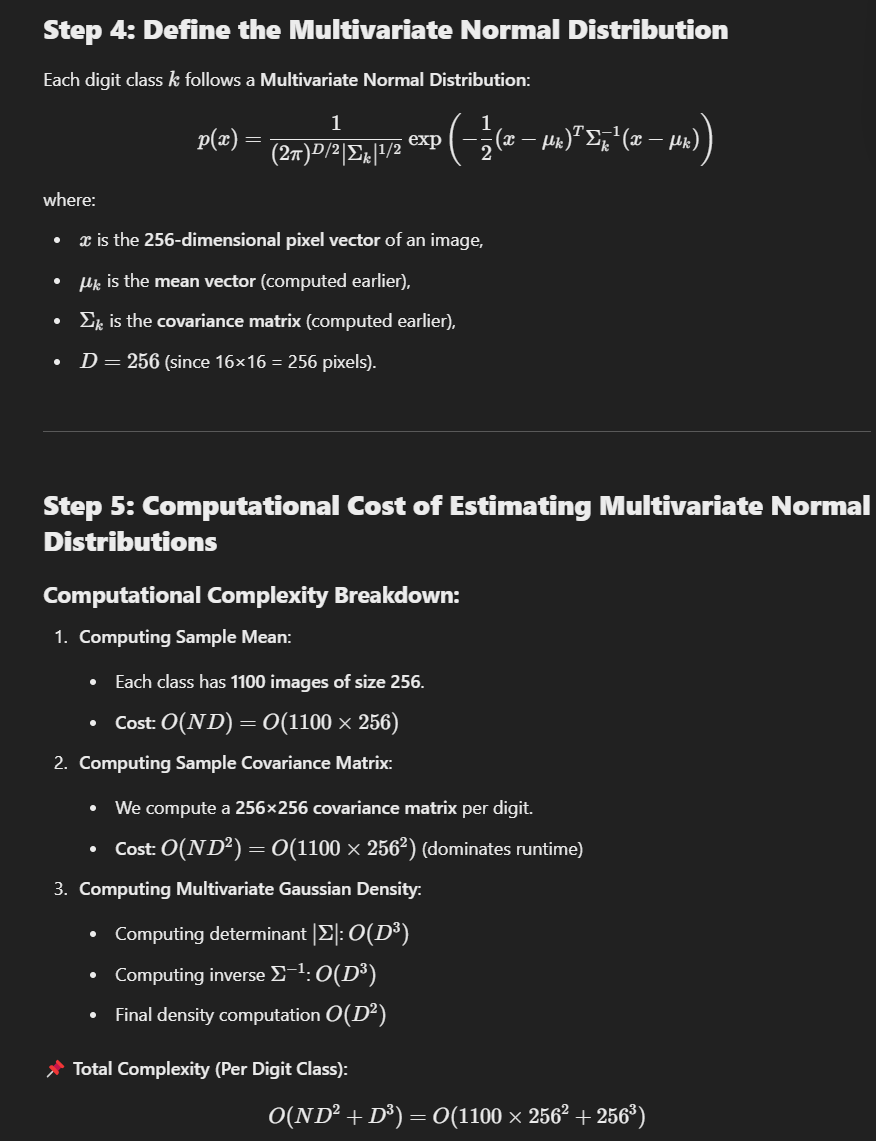
